<a href="https://www.kaggle.com/code/mersaidylmaz/siha-detection-with-yolov8?scriptVersionId=147197073" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5016.7/8062.4 GB disk)


##  <b> <span style='color:#16C2D5'>|</span> Ultralytics Kütüphanesinin İndirilmesinden Sonra YOLO'nun İmport Edilmesi </b>

In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## <b> <span style='color:#16C2D5'>|</span> Datasetin Sistemden Çekilmesi </b>

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="wOUaBLdp5weZP9mmzP2z")
project = rf.workspace("mer-said-yilmaz").project("iha_detection")
dataset = project.version(4).download("yolov8")

/kaggle/working/datasets
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-lsp 4.2.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pytoolconfig 1.2.5 requires packaging>=22.0, but you have packaging 21.3 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.


A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to iha_detection-4 in yolov8:: 100%|██████████| 764/764 [00:00<00:00, 8160.89it/s]


## <b> <span style='color:#16C2D5'>|</span> Modelin Verisetinde ki Etiketlenmiş Veriler İle Eğitilmesi </b>

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=60 imgsz=800 plots=True

/kaggle/working
100%|███████████████████████████████████████| 83.7M/83.7M [00:00<00:00, 221MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=/kaggle/working/datasets/iha_detection-4/data.yaml, epochs=60, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

In [6]:
!ls {HOME}/runs/detect/train/

F1_curve.png					  train_batch0.jpg
PR_curve.png					  train_batch1.jpg
P_curve.png					  train_batch1000.jpg
R_curve.png					  train_batch1001.jpg
args.yaml					  train_batch1002.jpg
confusion_matrix.png				  train_batch2.jpg
events.out.tfevents.1697706429.3044cef908cd.69.0  val_batch0_labels.jpg
results.csv					  val_batch0_pred.jpg
results.png					  weights


## <b> <span style='color:#16C2D5'>|</span> Karışıklık Matrisin İncelenmesi Ve Tahminlerin Ön Kontrolü </b>

/kaggle/working


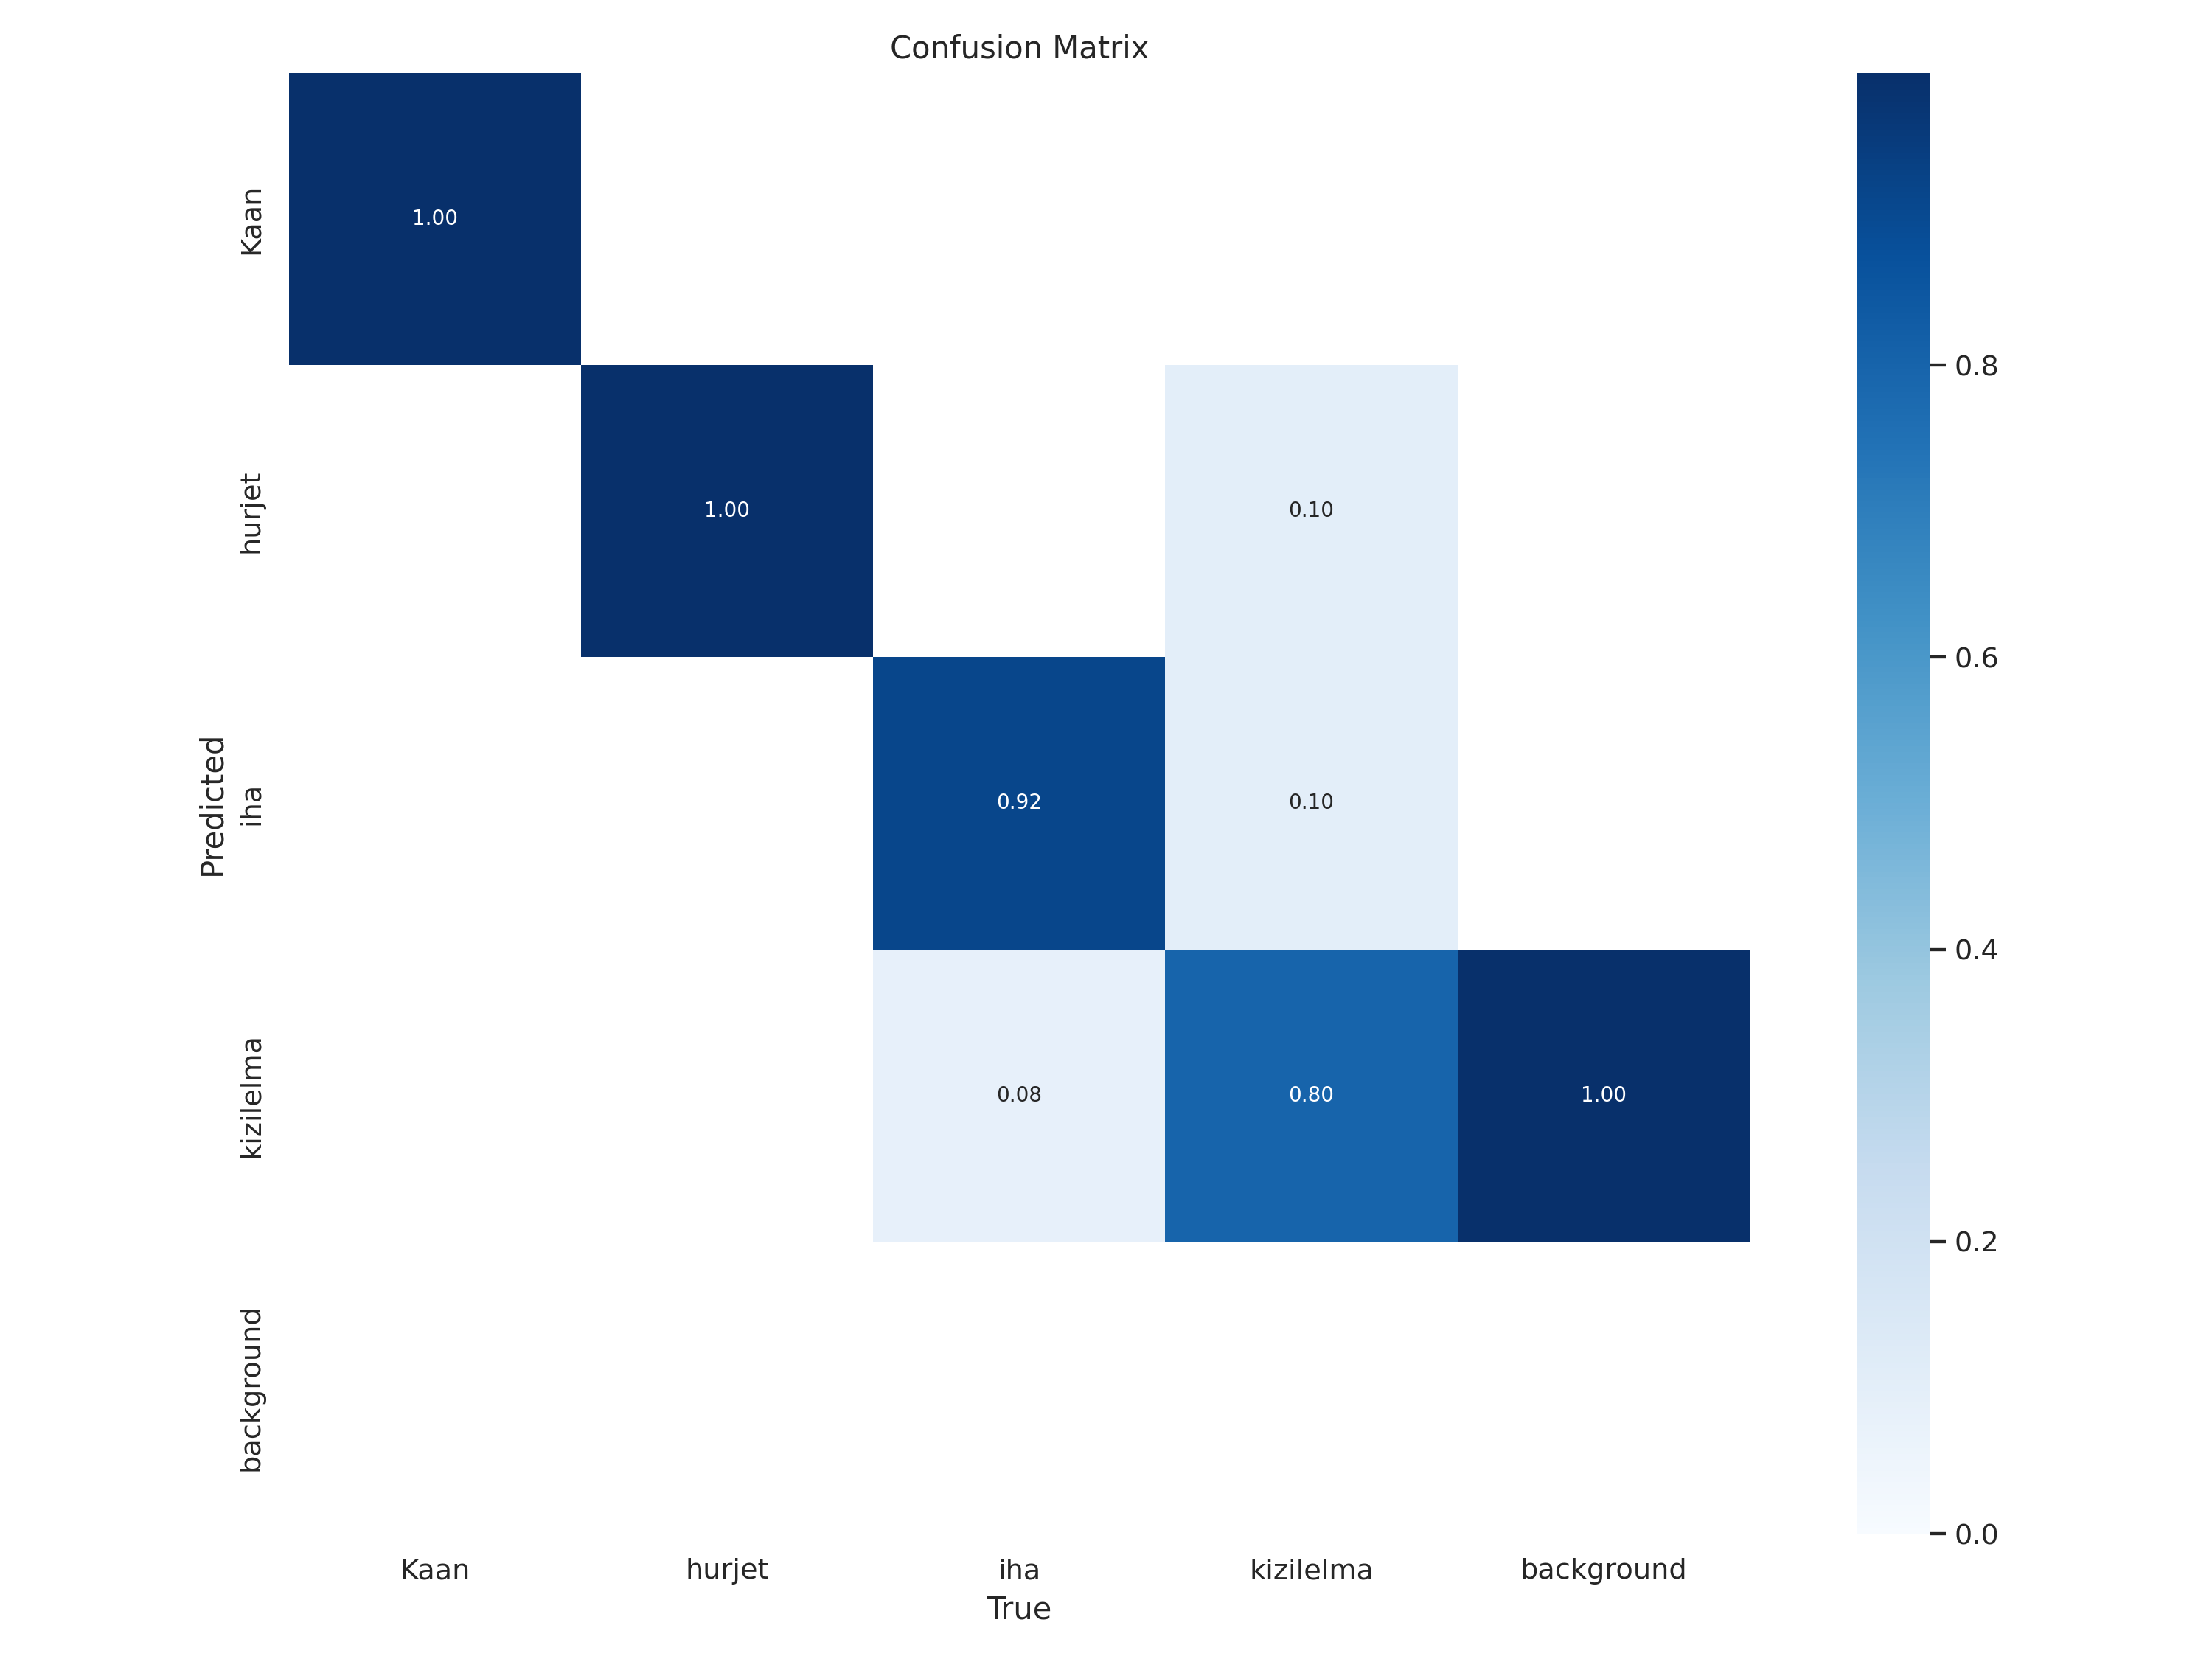

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

## <b> <span style='color:#16C2D5'>|</span> Loss değerlerinin kontrolü </b>

/kaggle/working


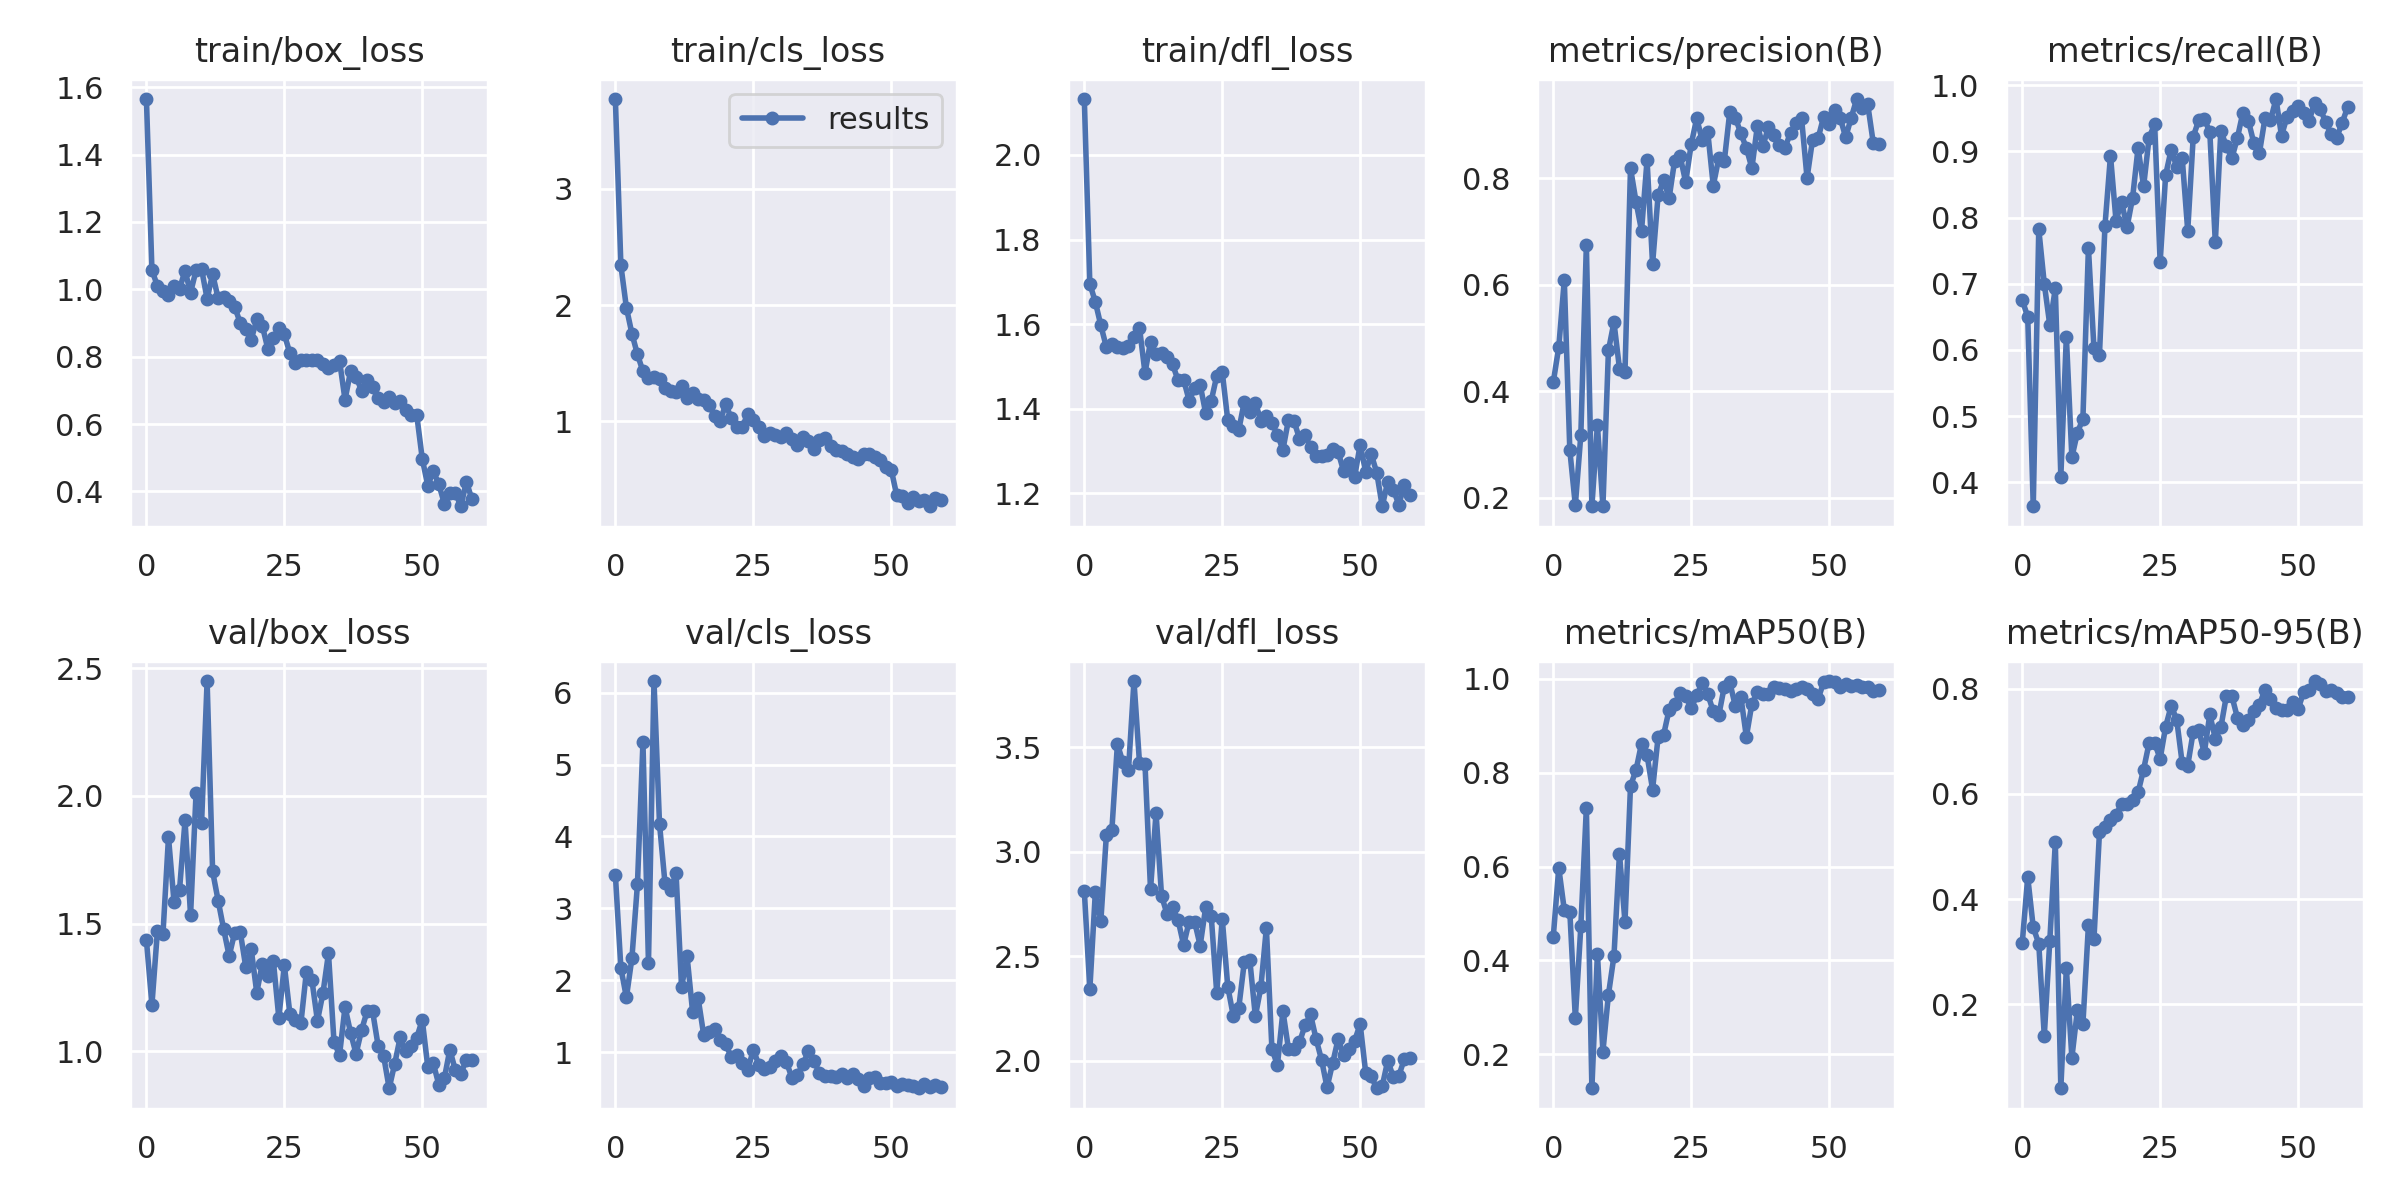

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## <b> <span style='color:#16C2D5'>|</span> Verisetinde ki Tahmin Edilen Değerlerin Görselleştrilmesi </b>

/kaggle/working


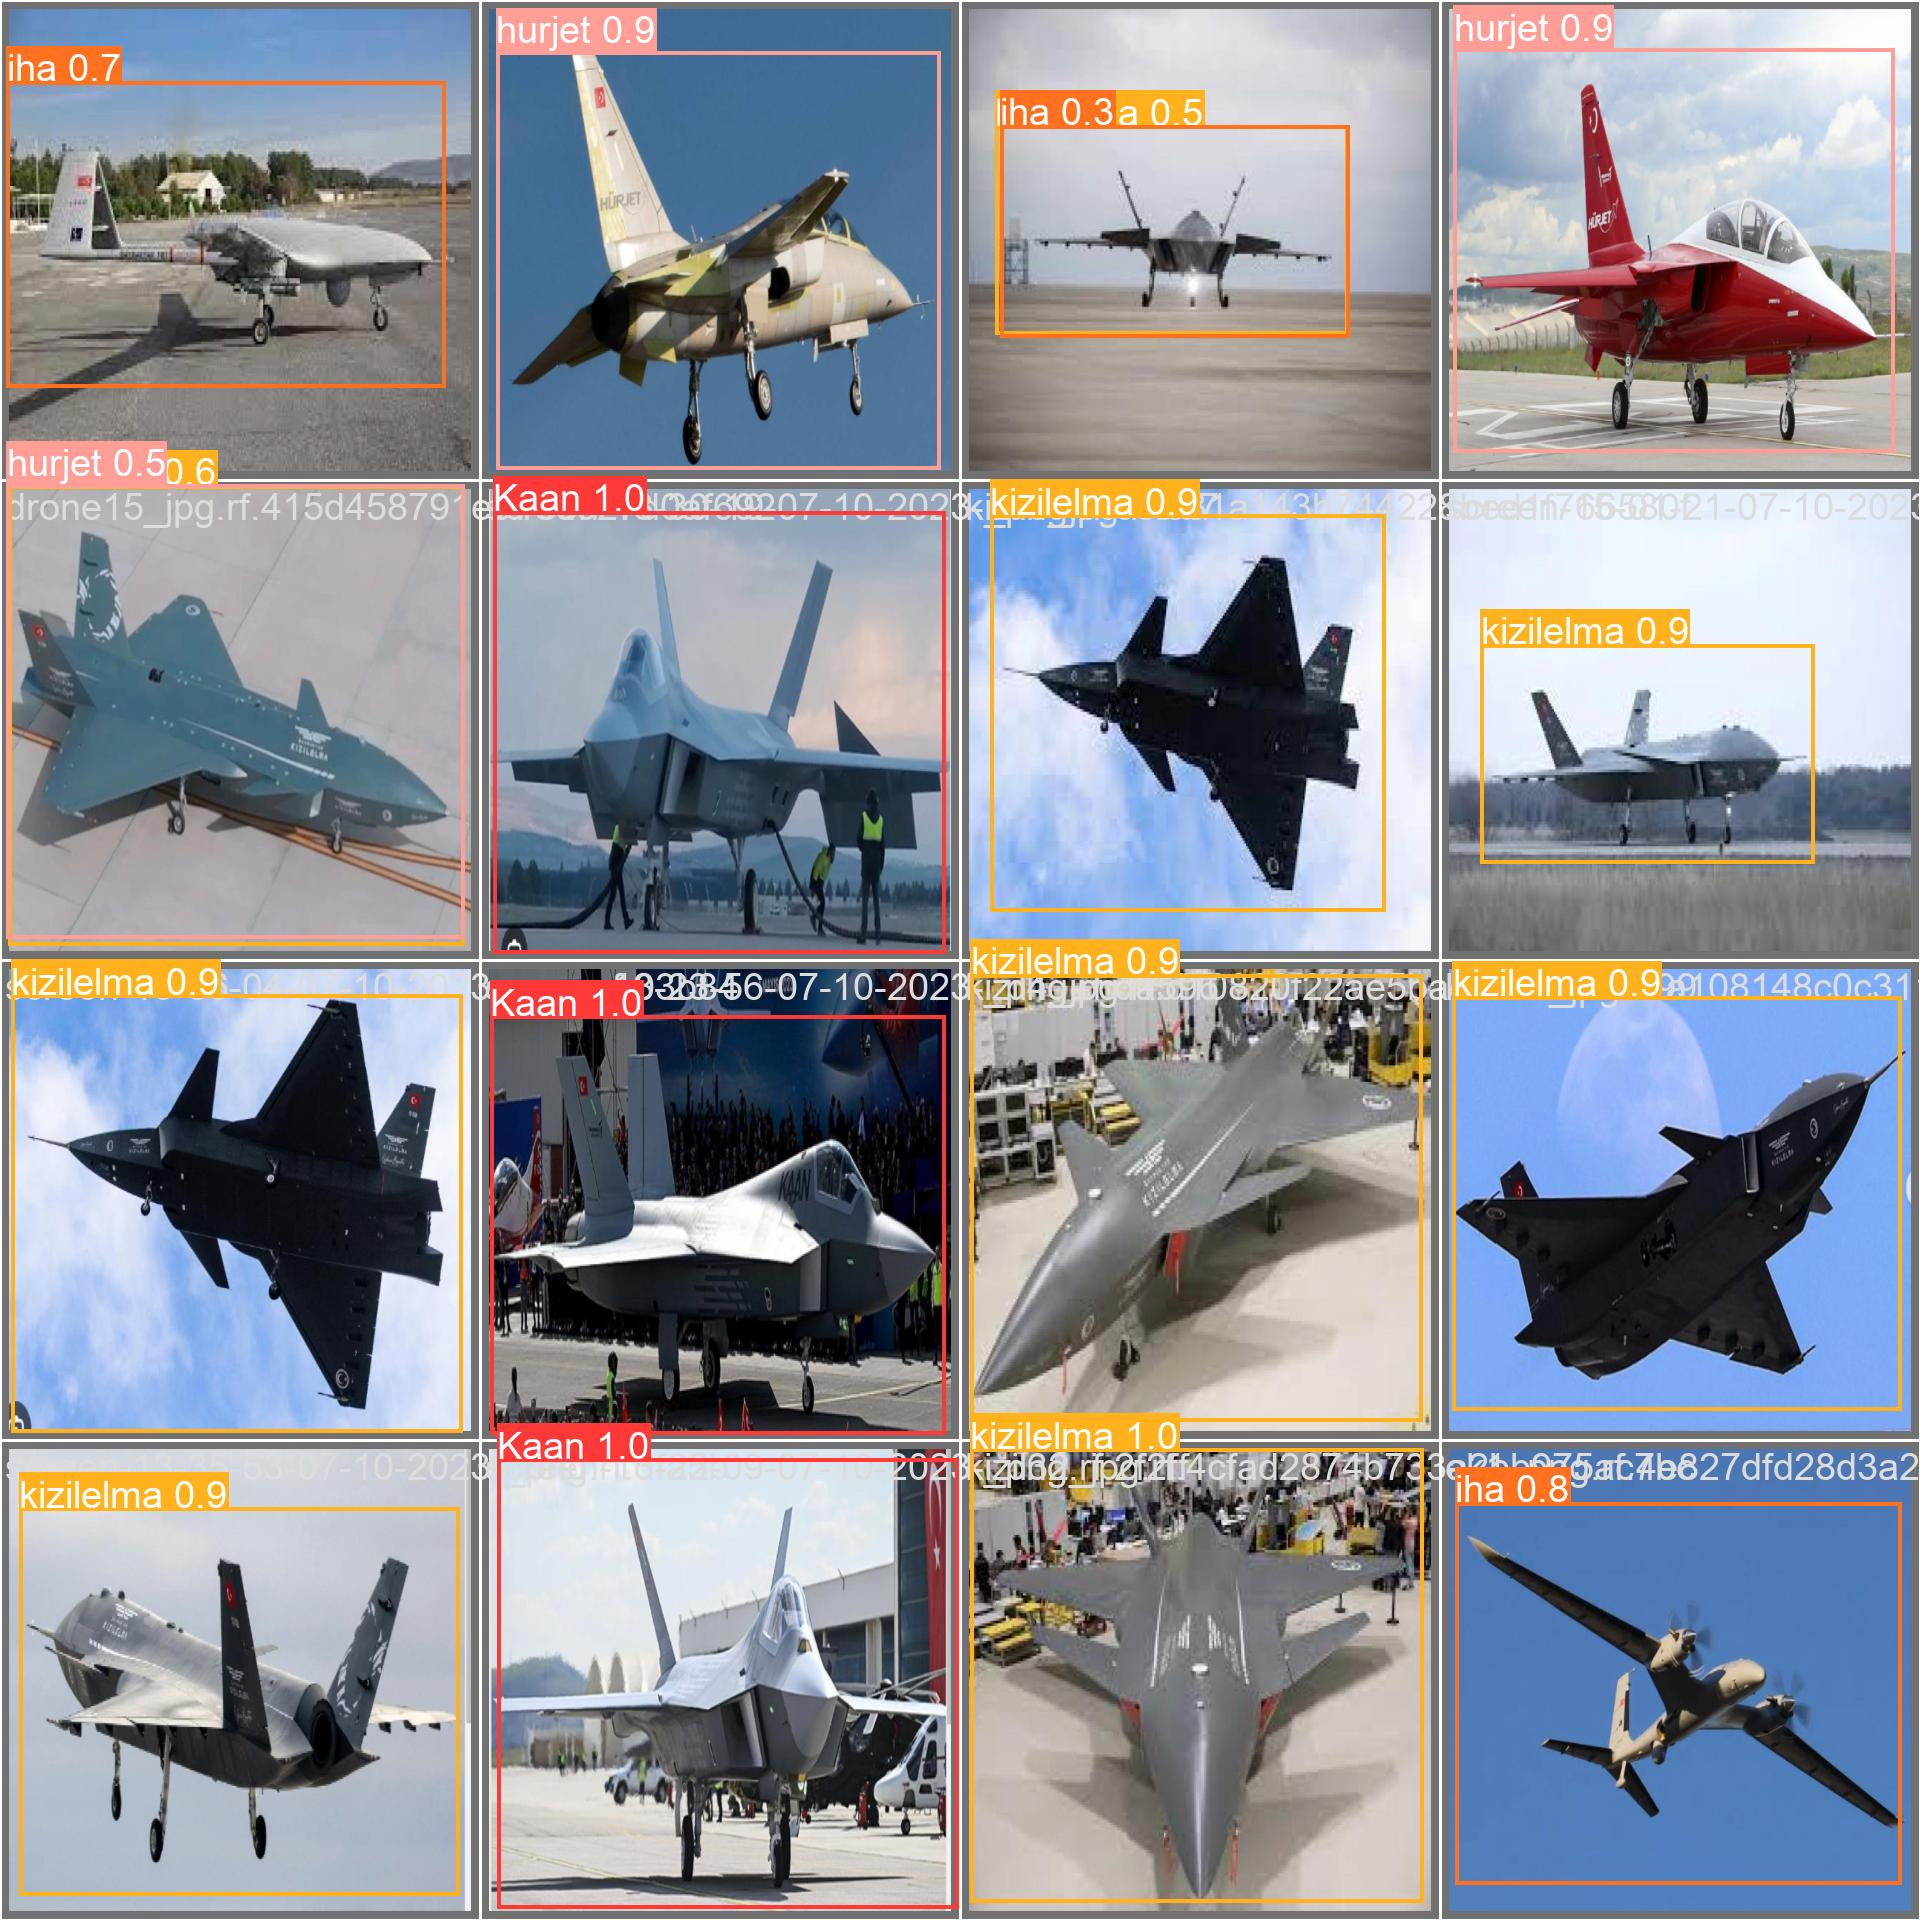

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## <b> <span style='color:#16C2D5'>|</span> Validation İşlemleri </b>

In [10]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43609692 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /kaggle/working/datasets/iha_detection-4/valid/labels.cache... 27 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         27         28      0.878      0.973      0.989      0.814
                  Kaan         27          3      0.864          1      0.995      0.911
                hurjet         27          3      0.739          1      0.995      0.913
                   iha         27         12          1      0.893      0.989      0.656
             kizilelma         27         10      0.9

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43609692 parameters, 0 gradients, 164.8 GFLOPs
image 1/43 /kaggle/working/datasets/iha_detection-4/test/images/drone13_jpg.rf.33a0158e654ad3db4d3ac46761e40a75.jpg: 800x800 1 iha, 100.5ms
image 2/43 /kaggle/working/datasets/iha_detection-4/test/images/drone20_jpg.rf.e44ded03cca6f2b1dbbf8683027b8b61.jpg: 800x800 1 iha, 57.8ms
image 3/43 /kaggle/working/datasets/iha_detection-4/test/images/drone31_jpg.rf.01786e4e399aa2aeb9564a6aab01a9e4.jpg: 800x800 2 ihas, 62.2ms
image 4/43 /kaggle/working/datasets/iha_detection-4/test/images/drone38_jpg.rf.62234709cf3bdb8692d3ac6e7ecaeca1.jpg: 800x800 1 iha, 60.2ms
image 5/43 /k

## <b> <span style='color:#16C2D5'>|</span> Validation İşleminden Sonra Tekrar Tahmin İşlemi Yapılması </b>

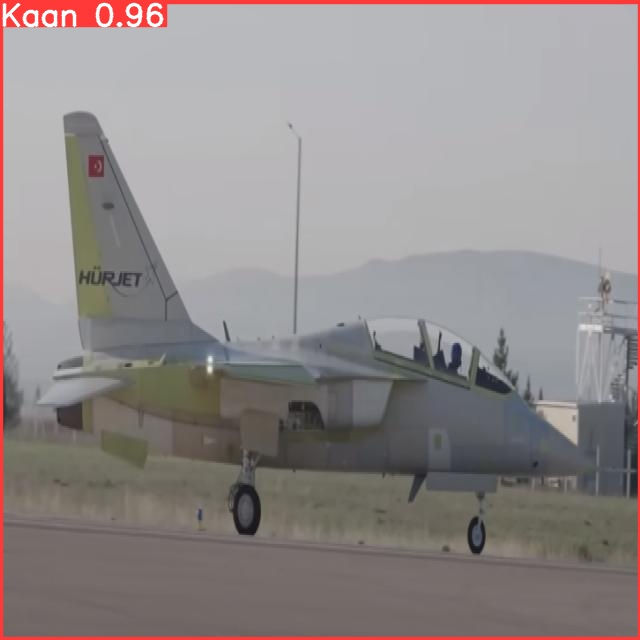

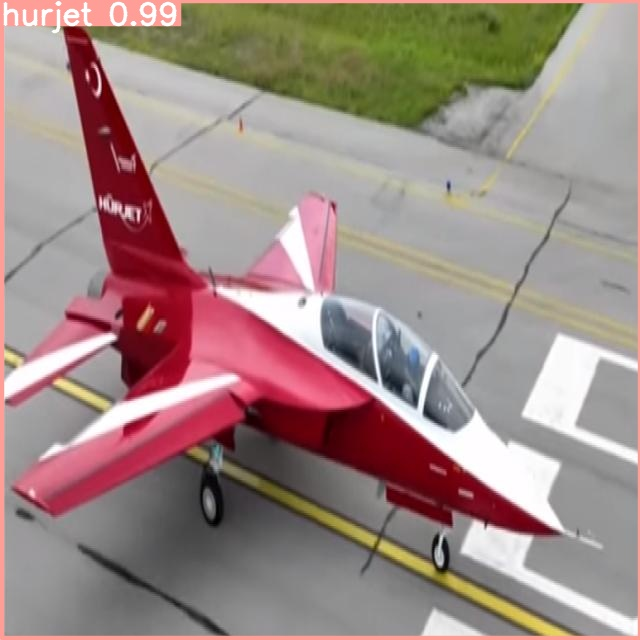

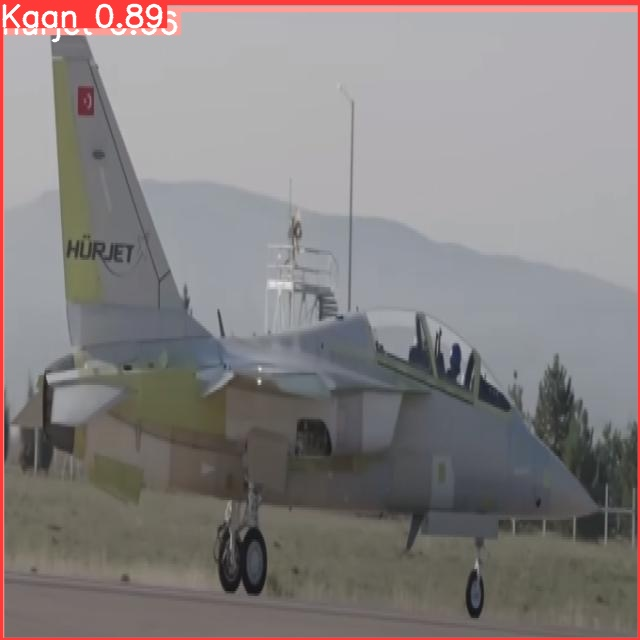

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")